In [3]:
import requests
import json
import os
import csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import datetime as dt
from scipy.stats import linregress, pearsonr

pd.options.display.float_format = "{:,.2f}".format

ww_gross = pd.read_csv("data/allmoviesdata.csv")

ww_gross

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
218,206,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
219,207,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


In [4]:
ww_gross['Year'].min()

1975

In [5]:
ww_gross['Year'].max()

2018

The r-value is 0.4445871942877436


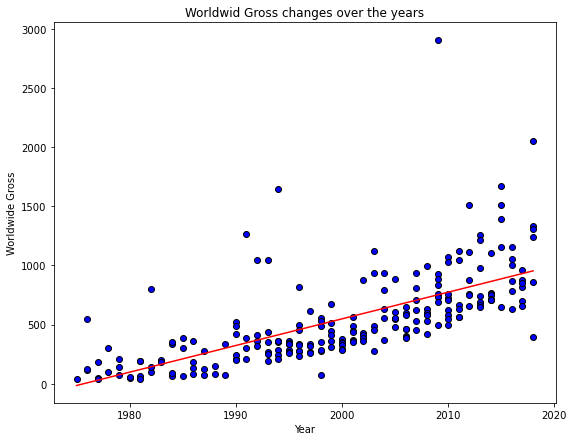

In [6]:
year = ww_gross['Year']
wwg = ww_gross['Worldwide Gross']
prod_budget= ww_gross["Production Budget"]
domestic= ww_gross["Domestic Gross"]
ww_gross["Worldwide Gross"] = (ww_gross["Worldwide Gross"].astype(float))/100000
ww_gross["Production Budget"] = (ww_gross["Production Budget"].astype(float))/100000
domestic= ww_gross["Domestic Gross"]= (ww_gross["Production Budget"].astype(float))/100000
ww_gross = ww_gross.sort_values(by=['Year'], ascending=True)

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, wwg)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,wwg, marker='o',edgecolors='black', facecolors='blue', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross")
plt.title('Worldwid Gross changes over the years')
print(f"The r-value is {rvalue**2}")

# Should be run twice to show graph.
plt.show()

The r-value is 0.48080109045730124


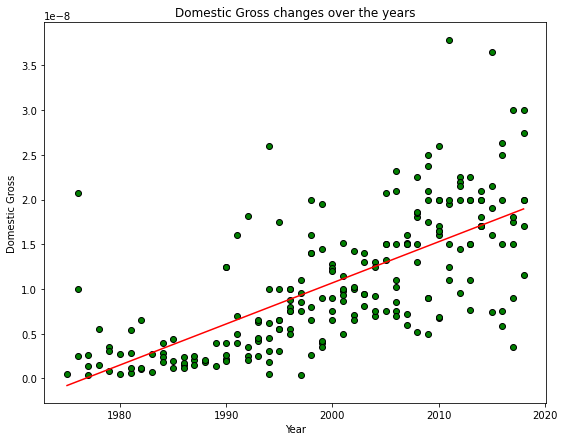

In [7]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, domestic)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,domestic, marker='o',edgecolors='black', facecolors='g', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Domestic Gross")
plt.title('Domestic Gross changes over the years')
print(f"The r-value is {rvalue**2}")
plt.show()

<AxesSubplot:title={'center':'Production Budget Changes'}, xlabel='Year'>

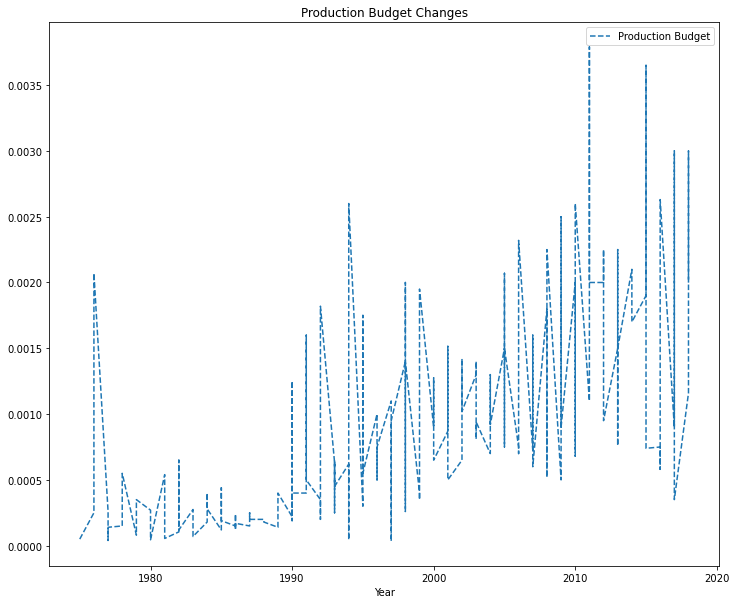

In [8]:
ww_gross.plot.line("Year", "Production Budget", linestyle='dashed', figsize=(12, 10), title= 'Production Budget Changes')

### Analysis: We can clearly see changes over the years in budgets both worldwide and domestic. Our datasets started from 1975 and ran all through 2018 using American made movies only.  The cost of movies have had a steady incline. Possibly due to inflation and changes in technology. There are some very high outliers when it comes to budgets but for the most part has been a steady inlcine instead of drastic changes in budgets. 